## Using Pre-trained model - ***xception***

In [1]:
from keras.applications.xception import Xception,preprocess_input
from keras.preprocessing.image import load_img, img_to_array
import os
import glob
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
model=Xception()

In [3]:
model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 299, 299, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 149, 149, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 149, 149, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 149, 149, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 147, 147, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 147, 147, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 147, 147, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 147, 147, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 147, 147, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 147, 147, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 147, 147, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 147, 147, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 74, 74, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 74, 74, 128)       │               

 Total params: 22,910,480 (87.40 MB)

 Trainable params: 22,855,952 (87.19 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [4]:
def preprocess(im):
    im=img_to_array(im)
    im=np.expand_dims(im,axis=0)
    im=preprocess_input(im)
    return im[0]

In [5]:
# Define the base directory
DATA_DIR = r'C:\Users\sanju\Desktop\NN Assignment\GrayScale28X28MaskDataSet'

# Construct the full path
path_to_waffles = os.path.join(DATA_DIR, 'train', 'with_mask')

# Print the path to debug
print(f"Path to waffles: {path_to_waffles}")

# Check if the path exists
if os.path.exists(path_to_waffles):
    # Change the directory
    os.chdir(path_to_waffles)
    print("Changed directory successfully.")
else:
    print(f"Error: The path {path_to_waffles} does not exist.")

Path to waffles: C:\Users\sanju\Desktop\NN Assignment\GrayScale28X28MaskDataSet\train\with_mask
Changed directory successfully.


In [6]:
train_with_mask_images = glob.glob("*")

In [7]:
train_with_mask_images

['-110603108-gettyimages-533567012.jpg',
 '-110695084-mask2.jpg',
 '0-with-mask.jpg',
 '0000305-62360-halyard-health-pfr-p3-respirator-face-mask-ffp.jpeg',
 '0000444-48296-halyard-health-surgical-mask-teddy-bear-print.jpeg',
 '007563.jpg',
 '0779db20580fc7b054ad6b1b7bd9fb35.jpeg',
 '1-respirator-mask.jpg',
 '10-with-mask.jpg',
 '100-with-mask.jpg',
 '101-with-mask.jpg',
 '103-with-mask.jpg',
 '104-with-mask.jpg',
 '105-with-mask.jpg',
 '106.jpg',
 '107-with-mask.jpg',
 '108-with-mask.jpg',
 '109-with-mask.jpg',
 '10Pcs-pack-Disposable-Non-Woven-Black-Face-Mask-Earloop-Anti.jpg',
 '112-with-mask.jpg',
 '113-with-mask.jpg',
 '115-with-mask.jpg',
 '116-with-mask.jpg',
 '117-with-mask.jpg',
 '118-with-mask.jpg',
 '119-with-mask.jpg',
 '12-with-mask.jpg',
 '120-with-mask.jpg',
 '122-with-mask.jpg',
 '123-with-mask.jpg',
 '124-with-mask.jpg',
 '125-with-mask.jpg',
 '126-with-mask.jpg',
 '128-with-mask.jpg',
 '129-with-mask.jpg',
 '13-with-mask.jpg',
 '131-with-mask.jpg',
 '132-with-mask.jpg'

In [8]:
with_mask_train = []
for i in train_with_mask_images:
    im = load_img(i, target_size=(224, 224,3))  # Load image from file path
    with_mask_train.append(preprocess(im))  # Add preprocessed image to the list

In [9]:
os.chdir(os.path.join(DATA_DIR,'test','with_mask'))
with_mask_test_img_names=glob.glob("*")

In [10]:
with_mask_test=[]
for i in with_mask_test_img_names:
    im=load_img(i,target_size=(224,224,3))
    with_mask_test.append(preprocess(im))

In [11]:
os.chdir(os.path.join(DATA_DIR,'train','without_mask'))
without_mask_train_img_names=glob.glob("*")

In [12]:
without_mask_train = []
for i in without_mask_train_img_names:
    im = load_img(i, target_size=(224, 224,3))  # Load image from file path
    without_mask_train.append(preprocess(im))

In [13]:
os.chdir(os.path.join(DATA_DIR,'test','without_mask'))
without_mask_test_img_names=glob.glob("*")

In [14]:
without_mask_test=[]
for i in without_mask_test_img_names:
    im=load_img(i,target_size=(224,224,3))
    without_mask_test.append(preprocess(im))

In [15]:
with_mask_train=np.array(with_mask_train,dtype='float32')
with_mask_test=np.array(with_mask_test,dtype='float32')
without_mask_train=np.array(without_mask_train,dtype='float32')
without_mask_test=np.array(without_mask_test,dtype='float32')

In [16]:
train=np.concatenate((with_mask_train,without_mask_train),axis=0)

In [17]:
train.shape   

(1315, 224, 224, 3)

In [18]:
y_train=[0]*with_mask_train.shape[0]+[1]*without_mask_train.shape[0]

In [19]:
y_train=np.array(y_train,dtype='float32')

In [20]:
base_model =Xception(include_top=False,pooling='avg',input_shape=(224,224,3))

In [21]:
train_features=base_model.predict(train)

42/42 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step


In [22]:
train_features.shape

(1315, 2048)

### Applying logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, 
                            precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, roc_curve 

In [26]:
clf=LogisticRegression()

In [27]:
clf.fit(train_features,y_train)

LogisticRegression()

In [28]:
test=np.concatenate((with_mask_test,without_mask_test),axis=0)
y_test=[0]*with_mask_test.shape[0]+[1]*without_mask_test.shape[0]
y_test=np.array(y_test,dtype='float32')

In [29]:
test_features=base_model.predict(test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step


In [30]:
test_features.shape

(194, 2048)

In [31]:
# Predictions
preds=clf.predict(test_features)

In [32]:
#Percentage of total coorect predictions
(preds==y_test).sum()/y_test.shape[0]

0.9845360824742269

In [33]:
from sklearn.metrics import classification_report

# Assuming preds and y_test are already defined
print(classification_report(y_test, preds, target_names=['without_mask', 'with_mask']))

              precision    recall  f1-score   support

without_mask       0.99      0.98      0.98        97
   with_mask       0.98      0.99      0.98        97

    accuracy                           0.98       194
   macro avg       0.98      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194



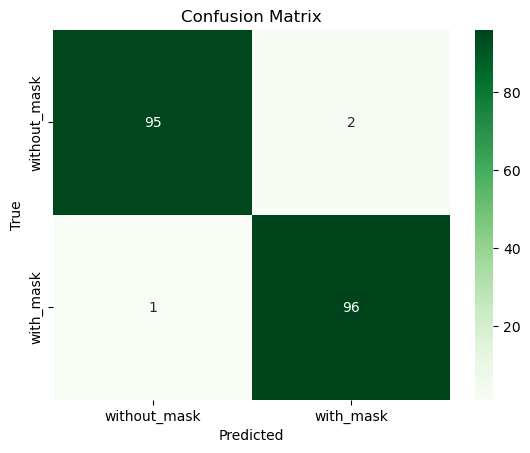

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['without_mask', 'with_mask'], yticklabels=['without_mask', 'with_mask'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The above model achieves an excellent accuracy of 98.45%, demonstrating strong performance in mask detection. By using the Xception model for feature extraction and logistic regression for classification, a robust and efficient solution suitable for real-time deployment model has been developed. Additionally, further evaluation with precision, recall, F1-score, and confusion matrix have provided very less false negatives and false positives which adds more insights into the model's performance and ensure it meets the bank's requirements.

=======================================================================================================================

# CNN MODEL

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
# Define paths to training and test sets
train_path = 'C:\\Users\\sanju\\Desktop\\NN Assignment\\GrayScale28X28MaskDataSet\\train'
test_path = 'C:\\Users\\sanju\\Desktop\\NN Assignment\\GrayScale28X28MaskDataSet\\test'

In [38]:
# Initialize ImageDataGenerator with rescaling
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [39]:
target_size=(28, 28)
color_mode='grayscale'
batch_size=32
class_mode='binary'
img_height = 28
img_width = 28

In [40]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(28, 28),  # Resize images to 28x28
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(28, 28),  # Resize images to 28x28
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(28, 28),  # Resize images to 28x28
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='binary'
)

Found 1053 images belonging to 2 classes.
Found 262 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


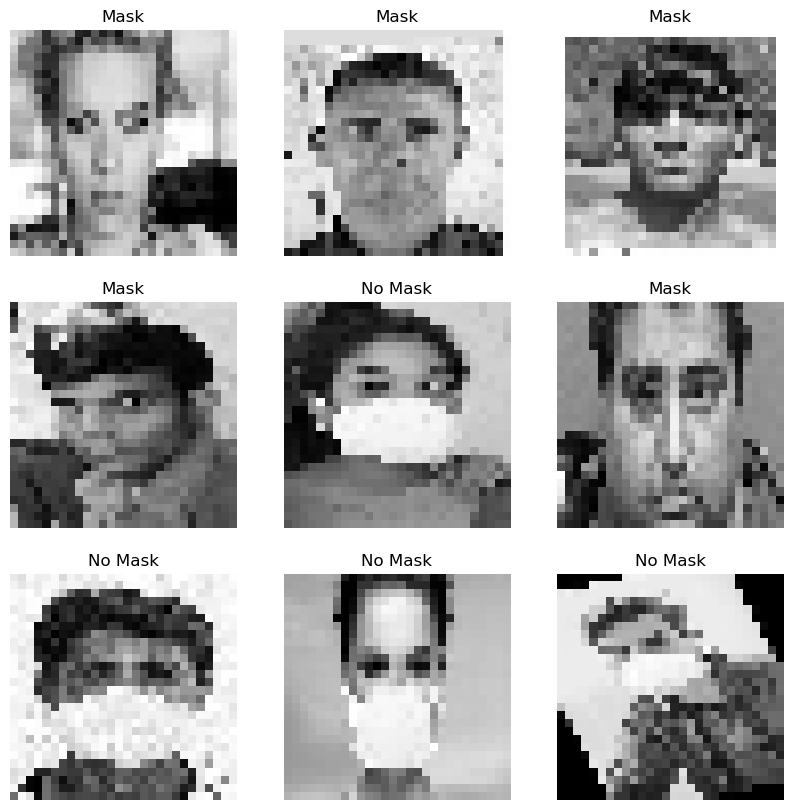

In [41]:
# Get a batch of images and labels
images, labels = next(train_generator)

# Check if labels are one-hot encoded
if len(labels.shape) > 1 and labels.shape[1] > 1:
    labels = np.argmax(labels, axis=1)

# Plot a few images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')  # Remove the singleton dimension
    plt.title('Mask' if labels[i] == 1 else 'No Mask')
    plt.axis('off')
plt.show()

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [43]:
# Model building
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])


history = model.fit(train_generator,epochs=20,validation_data=test_generator)

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 259ms/step - Precision: 0.4833 - Recall: 0.1316 - accuracy: 0.5162 - loss: 0.6918 - val_Precision: 1.0000 - val_Recall: 0.1237 - val_accuracy: 0.5619 - val_loss: 0.6843
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 305ms/step - Precision: 0.8191 - Recall: 0.4617 - accuracy: 0.6689 - loss: 0.6521 - val_Precision: 0.9072 - val_Recall: 0.9072 - val_accuracy: 0.9072 - val_loss: 0.3434
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 210ms/step - Precision: 0.8163 - Recall: 0.8436 - accuracy: 0.8244 - loss: 0.4058 - val_Precision: 0.9462 - val_Recall: 0.9072 - val_accuracy: 0.9278 - val_loss: 0.2267
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 228ms/step - Precision: 0.8993 - Recall: 0.9109 - accuracy: 0.9037 - loss: 0.2522 - val_Precision: 0.9468 - val_Recall: 0.9175 - val_accuracy: 0.9330 - val_loss: 0.1910
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step - Precision: 0.9421 - Recall: 0.9429 - accuracy: 0.9454 - loss: 0.1805 - val_Precision: 0.9740 - val_Rec

In [44]:
print('Model: Sequential')

train_loss, train_accuracy, train_precision, train_recall = model.evaluate(train_generator)

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Train Precision: {train_precision * 100:.2f}%")
print(f"Train Recall: {train_recall * 100:.2f}%")


test_loss, test_accuracy, test_precision, test_recall = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Precision: {test_precision * 100:.2f}%")
print(f"Test Recall: {test_recall * 100:.2f}%")

Model: Sequential
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 377ms/step - Precision: 0.9538 - Recall: 1.0000 - accuracy: 0.9754 - loss: 0.0597
Train Accuracy: 97.53%
Train Precision: 95.29%
Train Recall: 100.00%
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - Precision: 0.9210 - Recall: 0.9479 - accuracy: 0.9331 - loss: 0.1991
Test Accuracy: 93.30%
Test Precision: 92.86%
Test Recall: 93.81%


Lets do some predictions using the model that is build to identify if a person has wore a mask on his face or is without mask

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


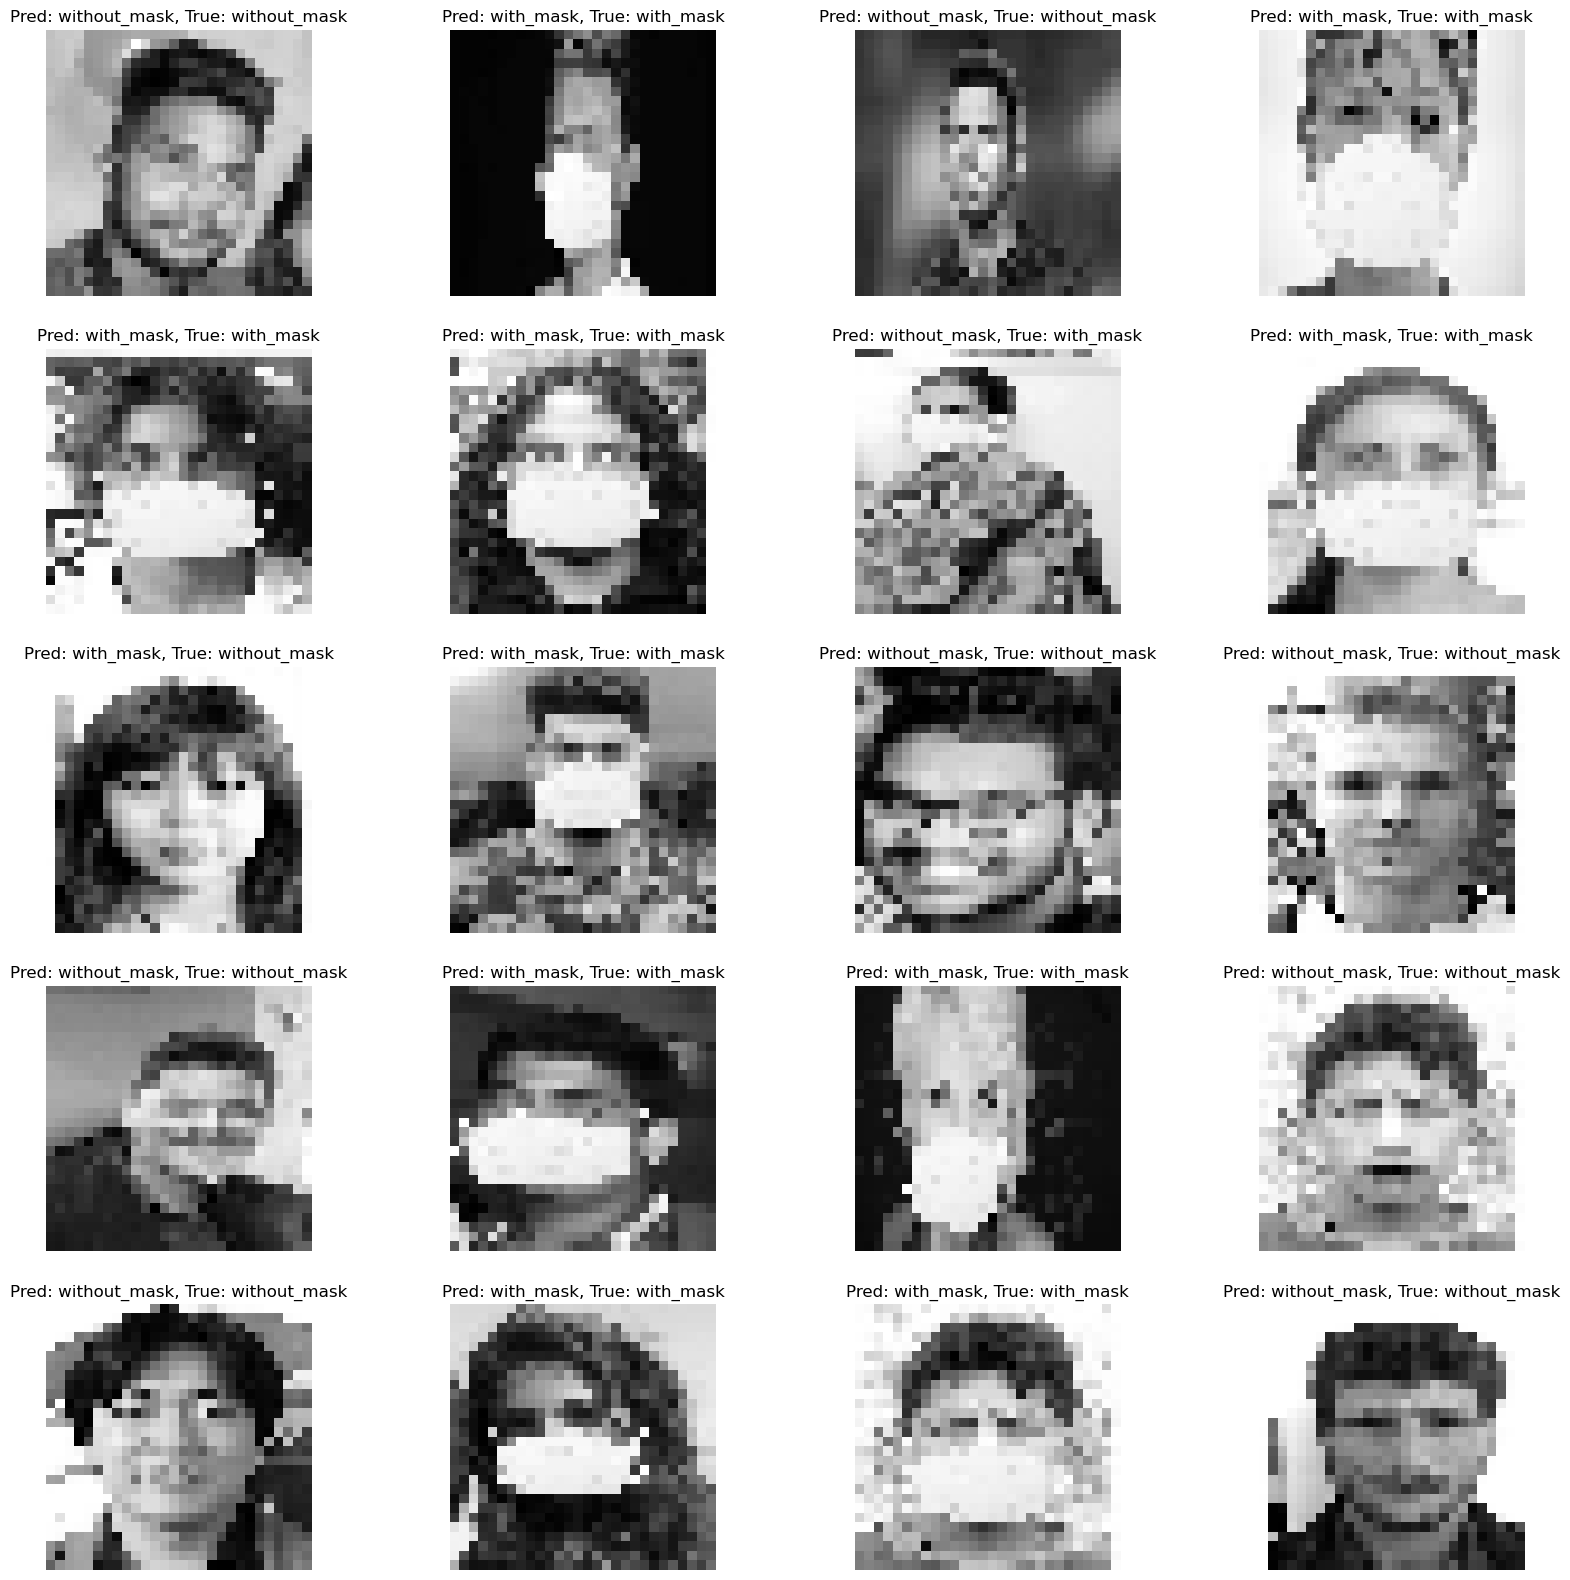

In [49]:
import matplotlib.pyplot as plt

def plot_predictions(images, predictions, true_labels, class_names):
    plt.figure(figsize=(20, 20))
    num_images = min(20, len(images))
    for i in range(num_images):
        ax = plt.subplot(5, 4, i + 1) 
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        pred_label = class_names[int(predictions[i] > 0.5)]
        true_label = class_names[int(true_labels[i])]
        plt.title(f"Pred: {pred_label}, True: {true_label}")
        plt.axis("off")
    plt.show()

images, true_labels = next(test_generator)
class_names = list(test_generator.class_indices.keys())

predictions = model.predict(images)

plot_predictions(images, predictions, true_labels, class_names)

Out of the 20 images subjected to predictions and compared with the actual result, it is observed that the model has claasified 18 images correctly. This indicates that the model built to predict whether a person is wearing a mask or is without a mask is working efficiently.The model has achieved a perfect accuracy of 93.30% on the test set, correctly identifying the presence or absence of masks in all 20 images.